# Analyse en Composantes Principales

In [1]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scientisttools.decomposition import PCA
from scientisttools.extractfactor import get_eig,get_pca
from scientisttools.graphics import (
    plotPCA,
    plot_eigenvalues,
    plot_contrib,
    plot_cosines)
from scientisttools.summarise import summaryPCA

c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Users\duver\AppData\Local\Programs\Python\Python310\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Données : Autos

In [2]:
# Chargement des données
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",index_col=0,sheet_name="DATA_ACP_ACTIF")
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada 1300
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CYL     18 non-null     int64
 1   PUISS   18 non-null     int64
 2   LONG    18 non-null     int64
 3   LARG    18 non-null     int64
 4   POIDS   18 non-null     int64
 5   VMAX    18 non-null     int64
dtypes: int64(6)
memory usage: 1008.0+ bytes


In [3]:
# ACP normée
acp = PCA(normalize=True,
          n_components = None,
          row_labels=D.index,
          col_labels=D.columns,
          row_sup_labels=None,
          quanti_sup_labels=None,
          quali_sup_labels=None,
          graph=False,
          figsize=None)
acp.fit(D)

PCA(col_labels=Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'VMAX'], dtype='object'),
    row_labels=Index(['Alfasud TI', 'Audi 100', 'Simca 1300', 'Citroen GS Club', 'Fiat 132',
       'Lancia Beta', 'Peugeot 504', 'Renault 16 TL', 'Renault 30',
       'Toyota Corolla', 'Alfetta 1.66', 'Princess 1800', 'Datsun 200L',
       'Taunus 2000', 'Rancho', 'Mazda 9295', 'Opel Rekord', 'Lada 1300'],
      dtype='object', name='Modele'))

In [4]:
# Valeurs propres
print(get_eig(acp))

       eigenvalue  difference  proportion  cumulative
Dim.1    4.420858    3.564796   73.680968   73.680968
Dim.2    0.856062    0.482996   14.267705   87.948672
Dim.3    0.373066    0.159144    6.217768   94.166440
Dim.4    0.213922    0.121121    3.565368   97.731809
Dim.5    0.092801    0.049511    1.546687   99.278495
Dim.6    0.043290         NaN    0.721505  100.000000


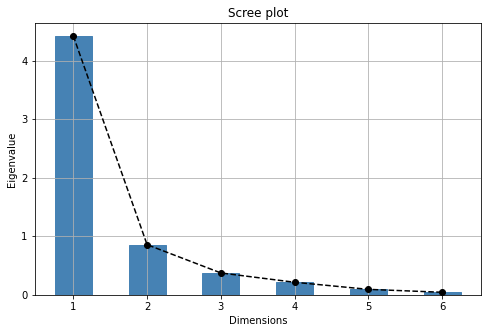

In [5]:
# Représentation graphique - valeurs propres
fig, axe =plt.subplots(figsize=(8,5))
plot_eigenvalues(acp,choice="eigenvalue",ax=axe)

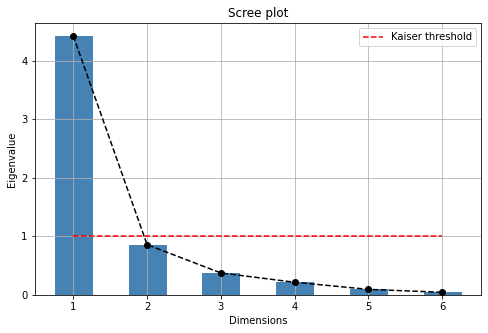

In [6]:
# Représentation graphique - valeurs propres (Kaiser - Guttman)
fig, axe =plt.subplots(figsize=(8,5))
plot_eigenvalues(acp,choice="eigenvalue",add_kaiser=True,ax=axe)

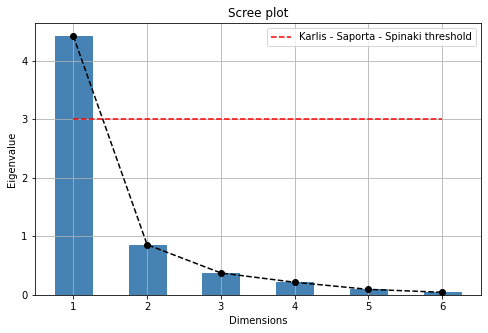

In [7]:
# Représentation graphique - valeurs propres (Karlis - Saporta - Spinaki)
fig, axe =plt.subplots(figsize=(8,5))
plot_eigenvalues(acp,choice="eigenvalue",add_kss=True,ax=axe)

In [8]:
# Valeurs propres - Test de Sphéricité de Bartlett
pd.DataFrame(acp.bartlett_sphericity_test_,index = ["Bartlett"])

,statistic,p-value,dof
Bartlett,95.119878,1.089129e-13,15.0


In [9]:
# Valeurs propres - Tests des bâtons brisés
print(acp.broken_stick_threshold_)

[2.45       1.45       0.95       0.61666667 0.36666667 0.16666667]


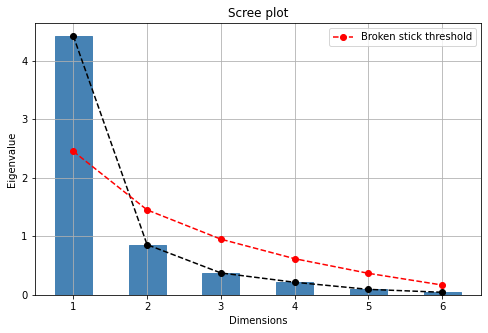

In [10]:
# Représentation graphique - valeurs propres (tests des bâtons brisés)
fig, axe =plt.subplots(figsize=(8,5))
plot_eigenvalues(acp,choice="eigenvalue",add_broken_stick=True,ax=axe)

In [11]:
# Corrélation des variables avec les facteurs
print(pd.DataFrame(acp.col_cor_[:,:2],index = D.columns,columns=acp.dim_index_[:2]))

          Dim.1     Dim.2
CYL    0.893464 -0.114906
PUISS  0.886858 -0.384689
LONG   0.886155  0.381029
LARG   0.813536  0.412736
POIDS  0.905187  0.224532
VMAX   0.754710 -0.573519


In [12]:
# Coordonnées des variables
print(pd.DataFrame(acp.col_coord_[:,:2],index = D.columns,columns=acp.dim_index_[:2]))

          Dim.1     Dim.2
CYL    0.893464 -0.114906
PUISS  0.886858 -0.384689
LONG   0.886155  0.381029
LARG   0.813536  0.412736
POIDS  0.905187  0.224532
VMAX   0.754710 -0.573519


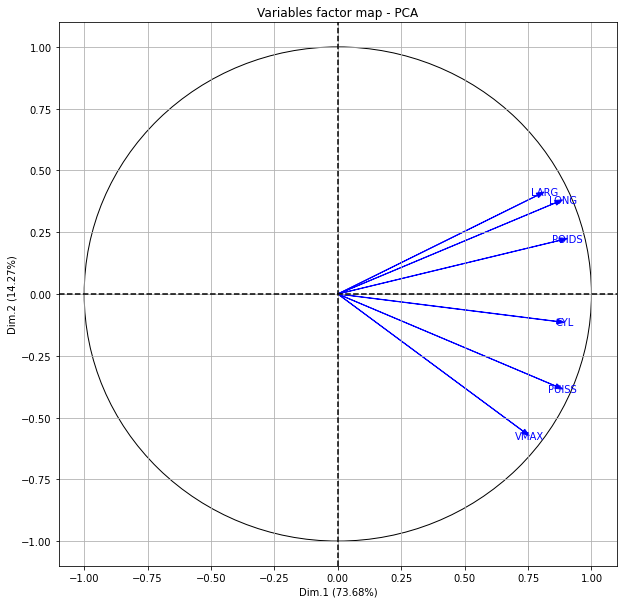

In [13]:
# Cercle des corrélations
fig, axe =plt.subplots(figsize=(10,10))
plotPCA(acp,choice="var",ax=axe)

In [14]:
# Cosinus carré
print(pd.DataFrame(acp.col_cos2_[:,:2],index = D.columns,columns=acp.dim_index_[:2]))

          Dim.1     Dim.2
CYL    0.798277  0.013203
PUISS  0.786517  0.147986
LONG   0.785270  0.145183
LARG   0.661841  0.170351
POIDS  0.819364  0.050415
VMAX   0.569588  0.328925


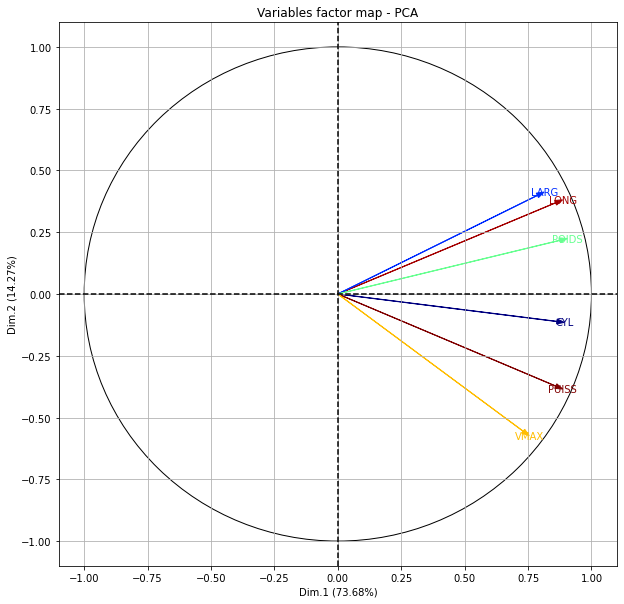

In [15]:
# Cercle des corrélations
fig, axe =plt.subplots(figsize=(10,10))
plotPCA(acp,choice="var",color="cos2",ax=axe)

In [16]:
#cos2 cumulé sur les 2 premiers facteurs
print(pd.DataFrame(np.cumsum(acp.col_cos2_[:,:2],axis=1),index=D.columns,columns=acp.dim_index_[:2]))

          Dim.1     Dim.2
CYL    0.798277  0.811481
PUISS  0.786517  0.934503
LONG   0.785270  0.930453
LARG   0.661841  0.832192
POIDS  0.819364  0.869779
VMAX   0.569588  0.898512


In [17]:
# Contributions
print(pd.DataFrame(acp.col_contrib_[:,:2],index = D.columns,columns=acp.dim_index_[:2]))

           Dim.1      Dim.2
CYL    18.057062   1.542342
PUISS  17.791052  17.286793
LONG   17.762847  16.959384
LARG   14.970882  19.899361
POIDS  18.534057   5.889155
VMAX   12.884099  38.422964


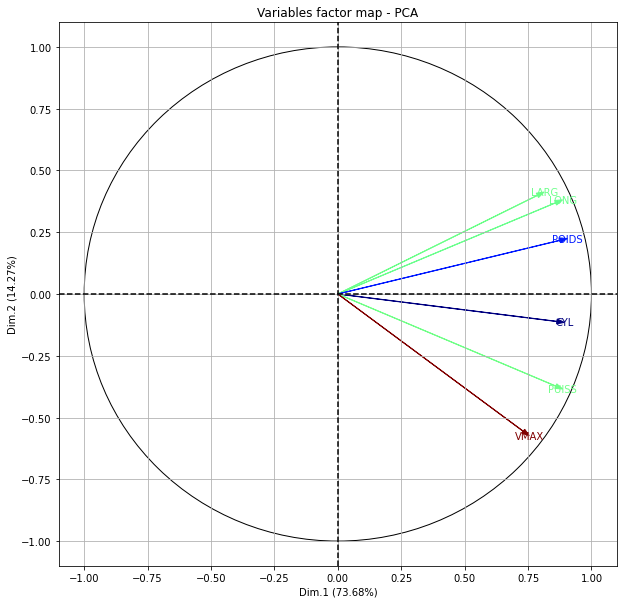

In [18]:
# Cercle des corrélations
fig, axe =plt.subplots(figsize=(10,10))
plotPCA(acp,choice="var",color="contrib",ax=axe)

In [19]:
#Coordonnées des individus
print(pd.DataFrame(acp.row_coord_[:,:2],index=D.index,columns=acp.dim_index_[:2]))

                    Dim.1     Dim.2
Modele                             
Alfasud TI      -2.138924 -1.785681
Audi 100         1.561459  1.527040
Simca 1300      -1.119385  0.674505
Citroen GS Club -2.573742 -0.112884
Fiat 132         0.427855 -0.695567
Lancia Beta     -0.304238  0.196149
Peugeot 504      0.683928  0.933057
Renault 16 TL   -1.948493  0.980448
Renault 30       4.409735 -1.063633
Toyota Corolla  -3.985782 -0.236240
Alfetta 1.66     0.437658 -1.912448
Princess 1800    1.018175  0.841712
Datsun 200L      2.941080  0.559175
Taunus 2000      1.314880 -0.486522
Rancho          -0.691111  0.897721
Mazda 9295       0.385709 -0.356185
Opel Rekord      2.289768 -0.104345
Lada 1300       -2.708574  0.143699


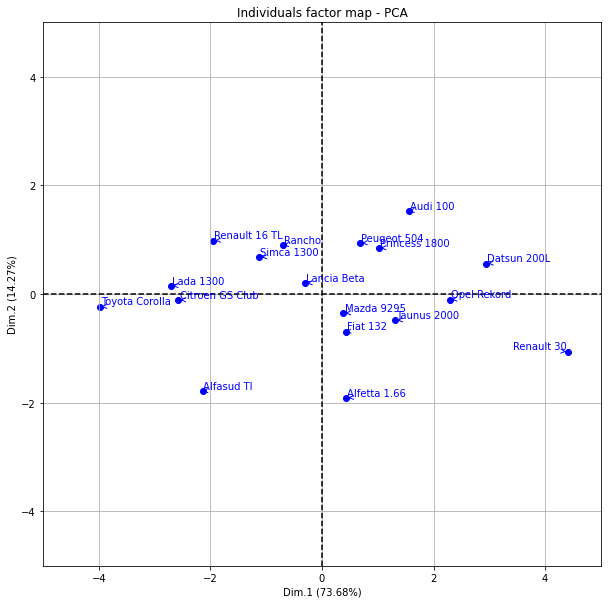

In [20]:
# Représentation des individus
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(acp,xlim=(-5,5),ylim=(-5,5),repel=True,ax=axe)

In [21]:
# Informations : Distance, poids et inertie
print(pd.DataFrame(acp.row_infos_,index = D.index,columns=["d(i,G)","p(i)","I(i)"]))

                   d(i,G)      p(i)      I(i)
Modele                                       
Alfasud TI       2.867957  0.055556  0.456954
Audi 100         2.583361  0.055556  0.370764
Simca 1300       1.469465  0.055556  0.119963
Citroen GS Club  2.603871  0.055556  0.376675
Fiat 132         1.081261  0.055556  0.064951
Lancia Beta      1.065340  0.055556  0.063053
Peugeot 504      1.229956  0.055556  0.084044
Renault 16 TL    2.374200  0.055556  0.313157
Renault 30       4.667939  0.055556  1.210537
Toyota Corolla   4.036105  0.055556  0.905008
Alfetta 1.66     2.111106  0.055556  0.247598
Princess 1800    1.397323  0.055556  0.108473
Datsun 200L      3.333560  0.055556  0.617368
Taunus 2000      1.566201  0.055556  0.136277
Rancho           1.401204  0.055556  0.109076
Mazda 9295       0.827358  0.055556  0.038029
Opel Rekord      2.466398  0.055556  0.337951
Lada 1300        2.814640  0.055556  0.440122


In [22]:
# Cosinus carré des individus
print(pd.DataFrame(acp.row_cos2_[:,:2],index=D.index,columns=acp.dim_index_[:2]))

                    Dim.1     Dim.2
Modele                             
Alfasud TI       0.556218  0.387670
Audi 100         0.365334  0.349406
Simca 1300       0.580284  0.210694
Citroen GS Club  0.976992  0.001879
Fiat 132         0.156579  0.413826
Lancia Beta      0.081555  0.033900
Peugeot 504      0.309202  0.575488
Renault 16 TL    0.673539  0.170535
Renault 30       0.892431  0.051920
Toyota Corolla   0.975219  0.003426
Alfetta 1.66     0.042978  0.820652
Princess 1800    0.530947  0.362855
Datsun 200L      0.778390  0.028137
Taunus 2000      0.704819  0.096496
Rancho           0.243273  0.410469
Mazda 9295       0.217336  0.185337
Opel Rekord      0.861900  0.001790
Lada 1300        0.926052  0.002607


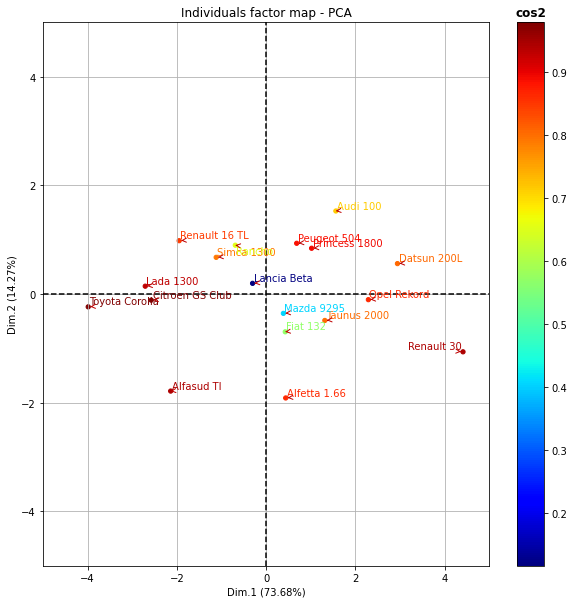

In [23]:
# Représentation des individus
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(acp,color="cos2",xlim=(-5,5),ylim=(-5,5),repel=True,ax=axe)

In [24]:
#cumul sur les 2 premiers facteurs 
print(pd.DataFrame(np.cumsum(acp.row_cos2_[:,:2],axis=1),index=D.index))

                        0         1
Modele                             
Alfasud TI       0.556218  0.943889
Audi 100         0.365334  0.714741
Simca 1300       0.580284  0.790978
Citroen GS Club  0.976992  0.978871
Fiat 132         0.156579  0.570405
Lancia Beta      0.081555  0.115454
Peugeot 504      0.309202  0.884690
Renault 16 TL    0.673539  0.844075
Renault 30       0.892431  0.944351
Toyota Corolla   0.975219  0.978645
Alfetta 1.66     0.042978  0.863630
Princess 1800    0.530947  0.893802
Datsun 200L      0.778390  0.806527
Taunus 2000      0.704819  0.801315
Rancho           0.243273  0.653742
Mazda 9295       0.217336  0.402674
Opel Rekord      0.861900  0.863690
Lada 1300        0.926052  0.928659


In [25]:
# Cosinus carré des individus
print(pd.DataFrame(acp.row_contrib_[:,:2],index=D.index))

                         0          1
Modele                               
Alfasud TI        5.749254  20.693307
Audi 100          3.063951  15.132933
Simca 1300        1.574636   2.952519
Citroen GS Club   8.324360   0.082697
Fiat 132          0.230046   3.139789
Lancia Beta       0.116318   0.249686
Peugeot 504       0.587817   5.649867
Renault 16 TL     4.771099   6.238372
Renault 30       24.436884   7.341856
Toyota Corolla   19.964025   0.362185
Alfetta 1.66      0.240708  23.735669
Princess 1800     1.302765   4.597791
Datsun 200L      10.870129   2.029163
Taunus 2000       2.172668   1.536130
Rancho            0.600229   5.230043
Mazda 9295        0.186956   0.823327
Opel Rekord       6.588764   0.070658
Lada 1300         9.219391   0.134007


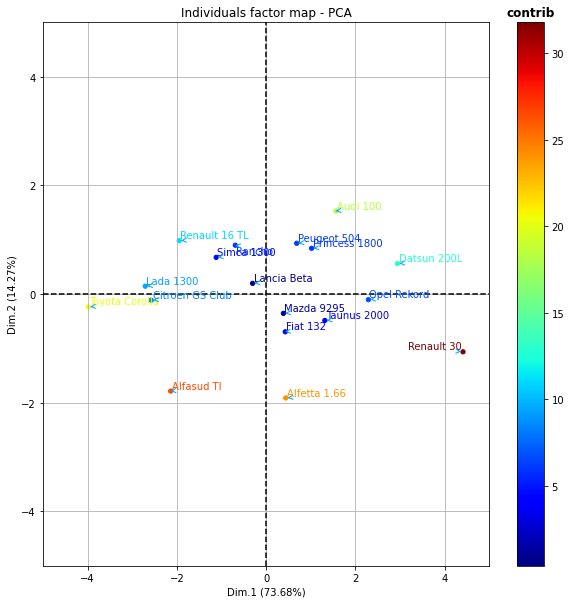

In [26]:
# Représentation des individus
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(acp,color="contrib",xlim=(-5,5),ylim=(-5,5),repel=True,ax=axe)

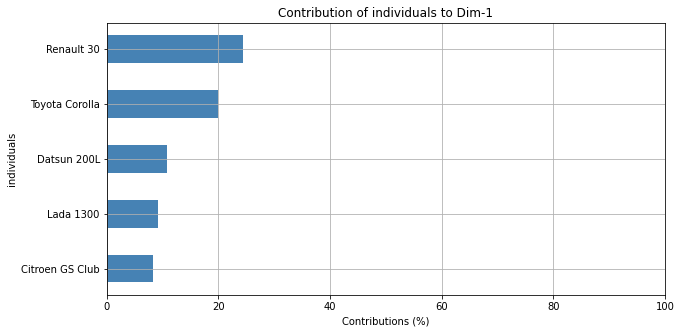

In [27]:
fig, axe = plt.subplots(figsize=(10,5))
plot_contrib(acp,choice="ind",top_contrib=5,ax=axe)

In [28]:
# Load dataset
IndSup = pd.read_excel("Data_Methodes_Factorielles.xlsx",index_col=0,sheet_name=1)
print(IndSup)

                CYL  PUISS  LONG  LARG  POIDS  VMAX
Modele                                             
Peugeot 604    2664    136   472   177   1410   180
Peugeot 304 S  1288     74   414   157    915   160


In [29]:
# Coordonnées des individus supplémentaires
coordSup = acp.transform(IndSup)
print(pd.DataFrame(coordSup[:,:2],index=IndSup.index,columns=acp.dim_index_[:2]))

                  Dim.1     Dim.2
Modele                           
Peugeot 604    5.563292 -0.338609
Peugeot 304 S -2.212241 -1.257779


In [30]:
# Variables supplémentaire
varIllus = pd.read_excel("Data_Methodes_Factorielles.xlsx",sheet_name="DATA_ACP_VAR_ILLUS",index_col=0)
varIllus.index = D.index
print(varIllus)

                FINITION   PRIX  RPOIDPUIS
Modele                                    
Alfasud TI           2_B  30570  11.012658
Audi 100            3_TB  39990  13.058824
Simca 1300           1_M  29600  15.441176
Citroen GS Club      1_M  28250  15.762712
Fiat 132             2_B  34900  11.275510
Lancia Beta         3_TB  35480  13.170732
Peugeot 504          2_B  32300  14.683544
Renault 16 TL        2_B  32000  18.363636
Renault 30          3_TB  47700  10.312500
Toyota Corolla       1_M  26540  14.818182
Alfetta 1.66        3_TB  42395   9.724771
Princess 1800        2_B  33990  14.146341
Datsun 200L         3_TB  43980  11.913043
Taunus 2000          2_B  35010  11.020408
Rancho              3_TB  39450  14.112500
Mazda 9295           1_M  27900  13.192771
Opel Rekord          2_B  32700  11.200000
Lada 1300            1_M  22100  14.044118


In [31]:
# Variables quantitatives  quantitatives
varquant = varIllus[["PRIX","RPOIDPUIS"]]
# Coordonnées des variables quantitatives supplémentaires
coordVquant = acp._compute_quanti_sup_stats(varquant)
coordVquant.keys()

dict_keys(['corr', 'coord', 'cos2', 'ftest'])

In [32]:
print(coordVquant["corr"])

        CYL     PUISS      LONG      LARG     POIDS      VMAX
0  0.638581  0.798700  0.643757  0.546649  0.753295  0.581760
1 -0.490164 -0.846799 -0.288433 -0.257611 -0.341950 -0.848566


In [33]:
print(coordVquant["coord"].iloc[:,:2])

              Dim.1     Dim.2
PRIX       0.772475 -0.086708
RPOIDPUIS -0.589039  0.672545


In [34]:
# COS2 des variables quantitatives supplémentaires
print(coordVquant["cos2"].iloc[:,:2])

              Dim.1     Dim.2
PRIX       0.596718  0.007518
RPOIDPUIS  0.346967  0.452317


In [35]:
print(coordVquant["ftest"].iloc[:,:2])

              Dim.1     Dim.2
PRIX       3.975372 -0.336666
RPOIDPUIS -2.618884  3.157937


In [36]:
# Variables uqlitatives supplémentaires
varqual = varIllus["FINITION"]
qualinfos = acp._compute_quali_sup_stats(varqual)
print(qualinfos.keys())

dict_keys(['stats', 'coord', 'cos2', 'dist', 'eta2', 'vtest'])


In [37]:
# Coordonnées des modalités supplémentaires
print(qualinfos["coord"].iloc[:,:2])

                  Dim.1     Dim.2
FINITION_1_M  -2.000355  0.022579
FINITION_2_B   0.235313 -0.045271
FINITION_3_TB  1.392430  0.034001


In [38]:
# COS2 des modalités supplémentaires
print(qualinfos["cos2"].iloc[:,:2])

                  Dim.1     Dim.2
FINITION_1_M   0.996454  0.000127
FINITION_2_B   0.445067  0.016473
FINITION_3_TB  0.941991  0.000562


In [39]:
# Distance des modalités à l'origine
print(qualinfos["dist"])

                   dist
FINITION_1_M   4.015660
FINITION_2_B   0.124413
FINITION_3_TB  2.058260


In [40]:
# Rapport de corrélation
print(qualinfos["eta2"].iloc[:,:2])

             Dim.1     Dim.2
FINITION  0.402484  0.001547


In [41]:
# Valeur - test
print(qualinfos["vtest"].iloc[:,:2])

                  Dim.1     Dim.2
FINITION_1_M  -2.432717  0.062401
FINITION_2_B   0.368103 -0.160934
FINITION_3_TB  1.930766  0.107138


## Données Burger - King

In [42]:
# Load dataset
D = pd.read_excel("Data_Methodes_Factorielles.xlsx",index_col=0,sheet_name=3)
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, BK__Double_Stacker to Tacos(2)
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Calories      17 non-null     float64
 1   Fat_Cal       17 non-null     float64
 2   Protein       17 non-null     float64
 3   Fat           17 non-null     float64
 4   Sat_Fat       17 non-null     float64
 5   Chol          17 non-null     float64
 6   Sodium        17 non-null     float64
 7   Carbs         17 non-null     float64
 8   Fiber         17 non-null     float64
 9   Sugar         17 non-null     float64
 10  Serving_size  17 non-null     int64  
 11  Meat          17 non-null     object 
dtypes: float64(10), int64(1), object(1)
memory usage: 1.7+ KB


In [43]:
# PCA normée
my_pca = PCA(n_components=3,
             row_labels=D.index,
             col_labels=D.columns[:10],
             row_sup_labels=None,
             quanti_sup_labels=[D.columns[10]],
             quali_sup_labels=[D.columns[-1]],
             graph=False,
             figsize=None)
my_pca.fit(D)

PCA(col_labels=Index(['Calories', 'Fat_Cal', 'Protein', 'Fat', 'Sat_Fat', 'Chol', 'Sodium',
       'Carbs', 'Fiber', 'Sugar'],
      dtype='object'),
    n_components=3, quali_sup_labels=['Meat'],
    quanti_sup_labels=['Serving_size'],
    row_labels=Index(['BK__Double_Stacker', 'BK_CHICKENFRIES(12pc)', 'Buck_Double',
       'CHICKENTENDERS_Sandwich', 'ChocolateFudgeSundae', 'DanishApple',
       'Double_Cheeseburger', 'Double_Hamburger', 'Double_Bacon_Cheeseburger',
       'GardenSalad(nochicken)', 'KRAFT_MacaroniandCheese', 'MuffinBlueberry',
       'Original_Chicken_Sandwichw/oMayo', 'Rodeo_Cheeseburger',
       'SpicyCHICK_NCRISP_Sandwich', 'SpicyCHICK_NCRISP_Sandwichw/oMayo',
       'Tacos(2)'],
      dtype='object', name='ITEM'))

## Valeurs propres

In [44]:
# Eigenvalues
print(get_eig(my_pca))

       eigenvalue  difference  proportion  cumulative
Dim.1    4.527377    2.081913   45.273768   45.273768
Dim.2    2.445463    1.035357   24.454634   69.728403
Dim.3    1.410106    0.736583   14.101060   83.829463


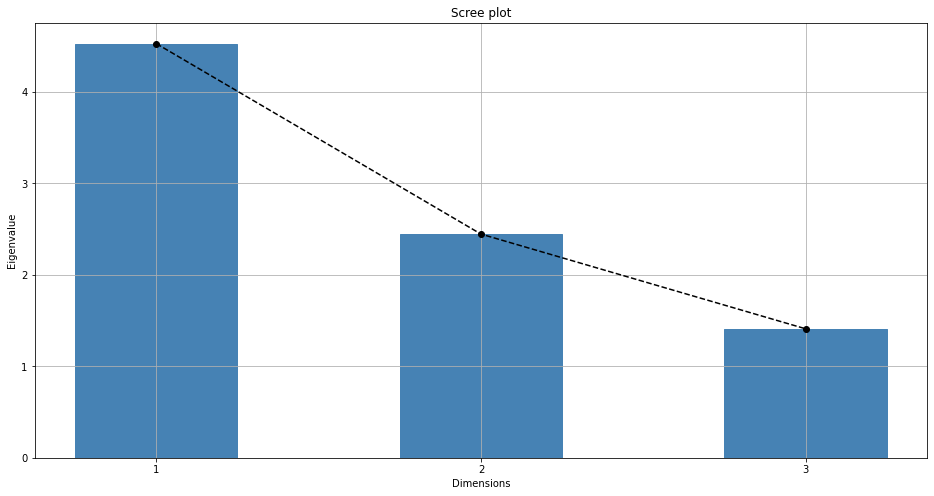

In [45]:
fig,axe = plt.subplots(figsize=(16,8))
plot_eigenvalues(my_pca,choice="eigenvalue",ax=axe,add_labels=False,
                 add_kaiser=False,add_kss=False,add_broken_stick=False)

### Règle de Kaiser

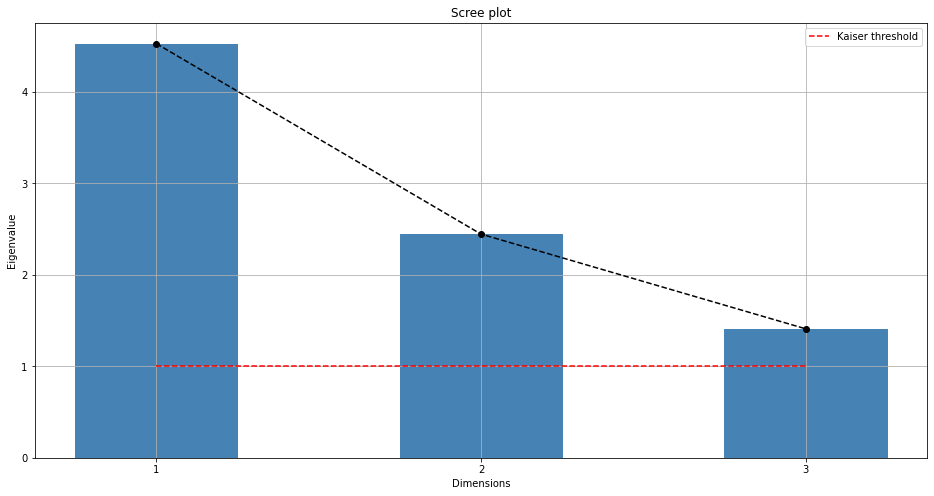

In [46]:
fig,axe = plt.subplots(figsize=(16,8))
plot_eigenvalues(my_pca,choice="eigenvalue",ax=axe,add_labels=False,
                 add_kaiser=True,add_kss=False,add_broken_stick=False)

### Règle KSS

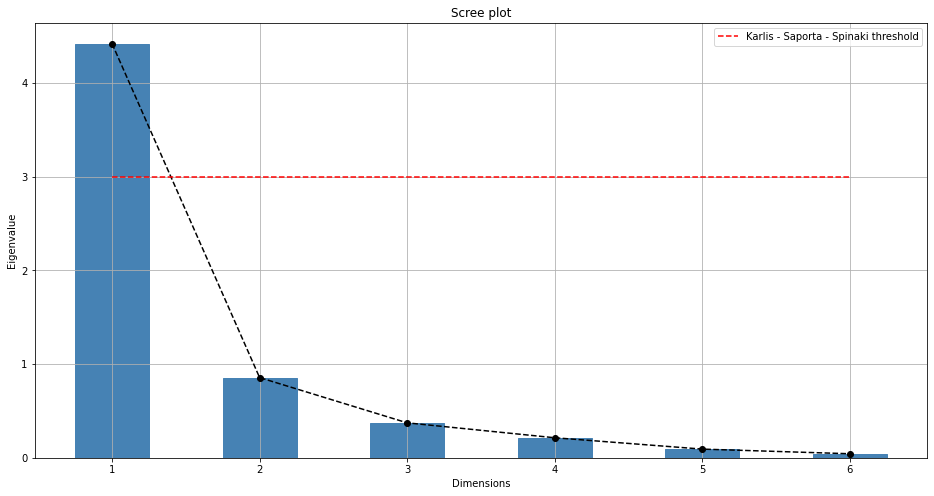

In [47]:
fig,axe = plt.subplots(figsize=(16,8))
plot_eigenvalues(acp,choice="eigenvalue",ax=axe,add_labels=False,
                 add_kaiser=False,add_kss=True,add_broken_stick=False)

### Règle broken stick

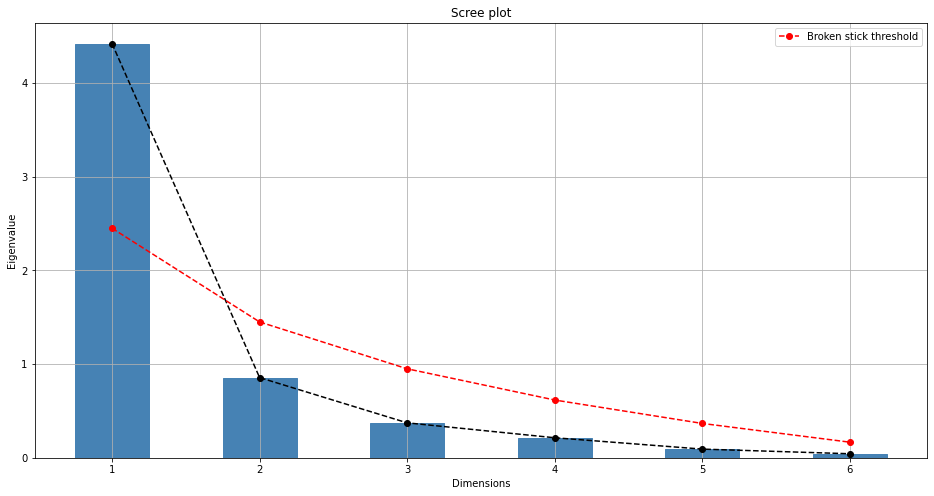

In [48]:
fig,axe = plt.subplots(figsize=(16,8))
plot_eigenvalues(acp,choice="eigenvalue",ax=axe,add_labels=False,
                 add_kaiser=False,add_kss=False,add_broken_stick=True)

## Analyse des individus

In [49]:
row = get_pca(my_pca,choice="row")
print(row.keys())

dict_keys(['coord', 'cos2', 'contrib', 'infos'])


### Coordonnées

In [50]:
#Coordonnées des individus
row["coord"]

,Dim.1,Dim.2,Dim.3
ITEM,,,
BK__Double_Stacker,-3.127459,-1.046610,1.210520
BK_CHICKENFRIES(12pc),-1.366619,-1.832960,-1.894792
Buck_Double,-0.971437,-0.925507,1.334239
CHICKENTENDERS_Sandwich,-0.784510,0.346840,-0.454460
ChocolateFudgeSundae,2.871065,2.461960,1.610034
DanishApple,-1.174891,3.486505,0.017283
Double_Cheeseburger,-1.421410,-1.082673,1.305828
Double_Hamburger,-0.261705,-0.716004,1.367521
Double_Bacon_Cheeseburger,-2.107755,-1.308678,1.309544


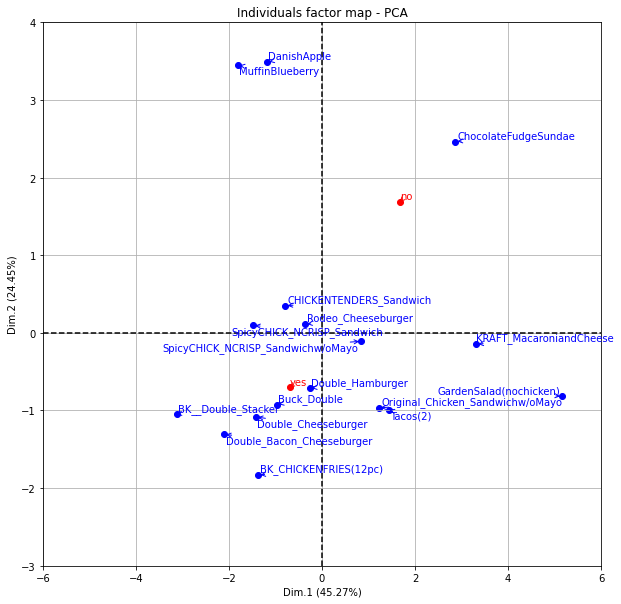

In [51]:
# Représentataion graphique
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(my_pca,xlim=(-6,6),ylim=(-3,4),color="blue", random_state=123,repel=True,
        ax=axe,habillage=None)

### Cosinus carré

In [52]:
# Cosinus carré des individus
row["cos2"]

,Dim.1,Dim.2,Dim.3
ITEM,,,
BK__Double_Stacker,0.768491,0.086065,0.115133
BK_CHICKENFRIES(12pc),0.183203,0.329567,0.352177
Buck_Double,0.257145,0.233404,0.485083
CHICKENTENDERS_Sandwich,0.145868,0.028512,0.048950
ChocolateFudgeSundae,0.468733,0.344668,0.147404
DanishApple,0.081246,0.715468,0.000018
Double_Cheeseburger,0.405519,0.235270,0.342250
Double_Hamburger,0.023776,0.177967,0.649198
Double_Bacon_Cheeseburger,0.553674,0.213442,0.213725


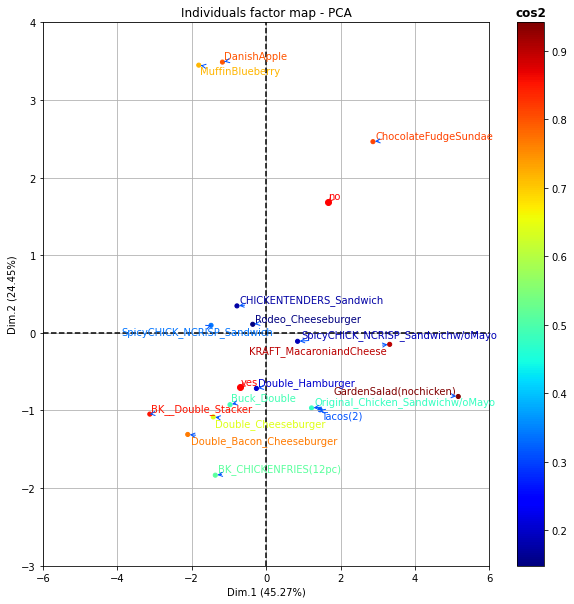

In [53]:
# Représentation graphique des individus - en fonction du COS2
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(my_pca,xlim=(-6,6),ylim=(-3,4),color="cos2", random_state=123,repel=True,
        ax=axe,habillage=None)

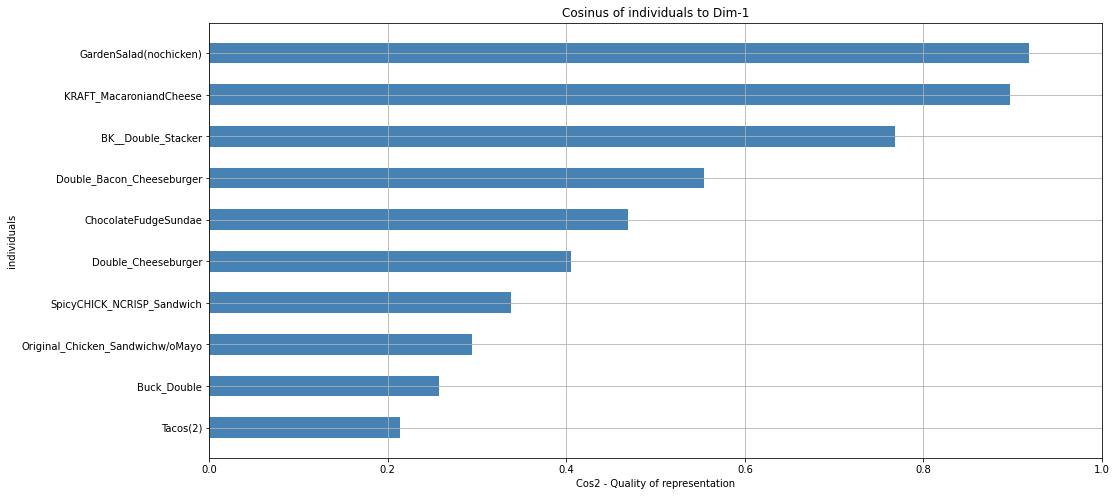

In [54]:
fig,axe = plt.subplots(figsize=(16,8))
plot_cosines(my_pca,choice="ind",ax=axe)

### Contribution

In [55]:
# Contribution des individus
row["contrib"]

,Dim.1,Dim.2,Dim.3
ITEM,,,
BK__Double_Stacker,12.708308,2.634875,6.112848
BK_CHICKENFRIES(12pc),2.426605,8.081569,14.976921
Buck_Double,1.226123,2.060390,7.426197
CHICKENTENDERS_Sandwich,0.799652,0.289367,0.861572
ChocolateFudgeSundae,10.710024,14.579805,10.813579
DanishApple,1.793492,29.239533,0.001246
Double_Cheeseburger,2.625084,2.819583,7.113298
Double_Hamburger,0.088987,1.233163,7.801308
Double_Bacon_Cheeseburger,5.772244,4.119604,7.153843


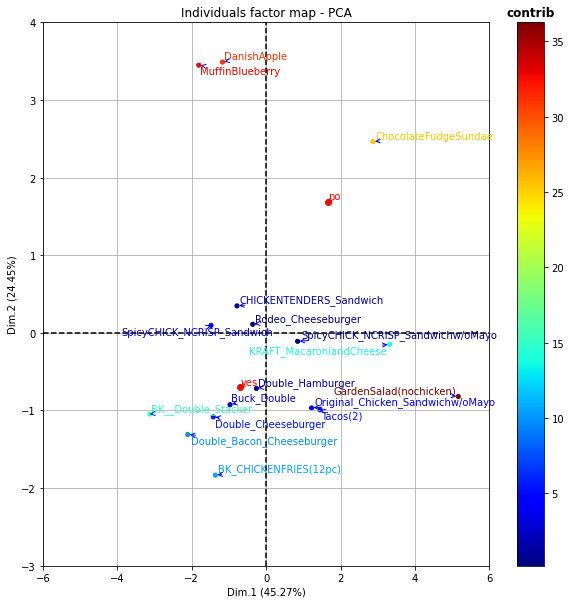

In [56]:
# Représentation graphique des individus - en fonction de la contribution
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(my_pca,xlim=(-6,6),ylim=(-3,4),color="contrib", random_state=123,repel=True,
                ax=axe,habillage=None)

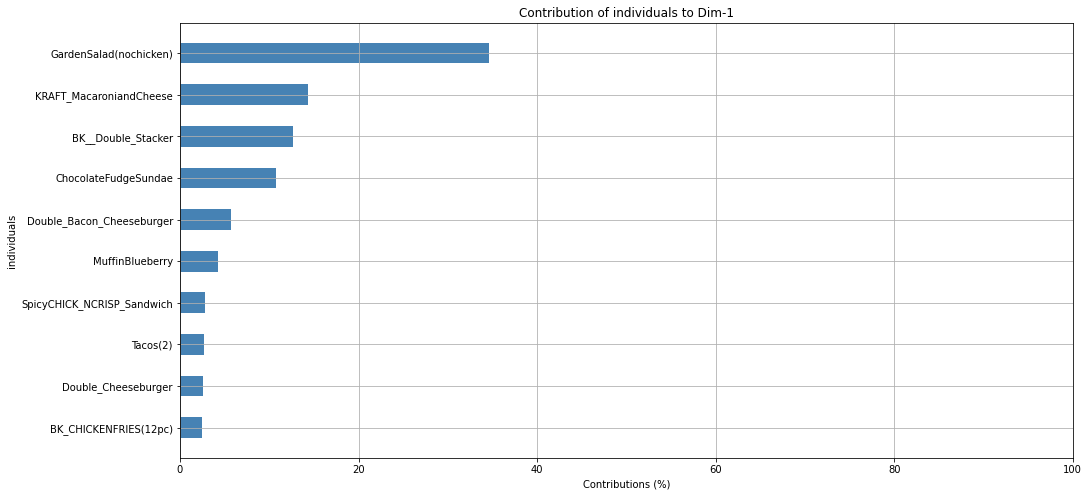

In [57]:
fig,axe = plt.subplots(figsize=(16,8))
plot_contrib(my_pca,choice="ind",ax=axe)

### Informations

In [58]:
# Informations sur les individus 
row["infos"]

,"d(i,G)",p(i),"I(i,G)"
ITEM,,,
BK__Double_Stacker,3.567568,0.058824,0.748679
BK_CHICKENFRIES(12pc),3.192871,0.058824,0.599672
Buck_Double,1.915692,0.058824,0.215875
CHICKENTENDERS_Sandwich,2.054086,0.058824,0.248192
ChocolateFudgeSundae,4.193534,0.058824,1.034454
DanishApple,4.121879,0.058824,0.999405
Double_Cheeseburger,2.232101,0.058824,0.293075
Double_Hamburger,1.697248,0.058824,0.169450
Double_Bacon_Cheeseburger,2.832650,0.058824,0.471994


## Analyse des variables

In [59]:
# Analyse  des variables
col = get_pca(my_pca,choice="var")
print(col.keys())

dict_keys(['corr', 'pcorr', 'coord', 'cos2', 'contrib', 'ftest', 'cor', 'quanti_sup', 'quali_sup'])


In [60]:
col["corr"]

,Calories,Fat_Cal,Protein,Fat,Sat_Fat,Chol,Sodium,Carbs,Fiber,Sugar
Calories,1.000000,0.915146,0.341687,0.906752,0.516495,0.482708,0.558400,0.619447,-0.211367,0.279887
Fat_Cal,0.915146,1.000000,0.387643,0.999134,0.526439,0.552246,0.556419,0.318095,-0.102428,0.078418
Protein,0.341687,0.387643,1.000000,0.394578,0.471616,0.595315,0.749269,-0.337815,-0.283188,-0.556202
Fat,0.906752,0.999134,0.394578,1.000000,0.528027,0.550703,0.560817,0.296291,-0.102422,0.063832
Sat_Fat,0.516495,0.526439,0.471616,0.528027,1.000000,0.540923,0.181898,0.112952,-0.492974,0.158121
Chol,0.482708,0.552246,0.595315,0.550703,0.540923,1.000000,0.319179,-0.029444,-0.275621,0.080542
Sodium,0.558400,0.556419,0.749269,0.560817,0.181898,0.319179,1.000000,-0.015983,0.073284,-0.411175
Carbs,0.619447,0.318095,-0.337815,0.296291,0.112952,-0.029444,-0.015983,1.000000,-0.129946,0.770141
Fiber,-0.211367,-0.102428,-0.283188,-0.102422,-0.492974,-0.275621,0.073284,-0.129946,1.000000,-0.125011
Sugar,0.279887,0.078418,-0.556202,0.063832,0.158121,0.080542,-0.411175,0.770141,-0.125011,1.000000


In [61]:
col["pcorr"]

,Calories,Fat_Cal,Protein,Fat,Sat_Fat,Chol,Sodium,Carbs,Fiber,Sugar
Calories,1.000000,-0.382197,0.733921,0.717799,0.233477,0.264478,0.312812,0.985538,-0.383711,-0.531369
Fat_Cal,-0.382197,1.000000,0.240017,0.915863,0.177695,0.369103,0.040625,0.472560,0.018367,-0.462132
Protein,0.733921,0.240017,1.000000,-0.522530,0.321534,0.344823,0.320298,-0.692986,0.002326,-0.025363
Fat,0.717799,0.915863,-0.522530,1.000000,-0.196311,-0.353859,-0.129462,-0.776139,0.142739,0.548860
Sat_Fat,0.233477,0.177695,0.321534,-0.196311,1.000000,-0.618839,-0.637232,-0.287421,0.120991,0.658996
Chol,0.264478,0.369103,0.344823,-0.353859,-0.618839,1.000000,-0.614735,-0.353204,0.276130,0.808615
Sodium,0.312812,0.040625,0.320298,-0.129462,-0.637232,-0.614735,1.000000,-0.300748,0.568537,0.462220
Carbs,0.985538,0.472560,-0.692986,-0.776139,-0.287421,-0.353204,-0.300748,1.000000,0.341735,0.635185
Fiber,-0.383711,0.018367,0.002326,0.142739,0.120991,0.276130,0.568537,0.341735,1.000000,-0.282357
Sugar,-0.531369,-0.462132,-0.025363,0.548860,0.658996,0.808615,0.462220,0.635185,-0.282357,1.000000


### Coordonnées

In [62]:
# Coordonnées des variables
col["coord"]

,Dim.1,Dim.2,Dim.3
Calories,-0.914058,0.313750,-0.204357
Fat_Cal,-0.921694,0.107219,-0.242269
Protein,-0.631428,-0.693490,0.177431
Fat,-0.919989,0.090268,-0.240045
Sat_Fat,-0.691355,0.049497,0.522215
Chol,-0.707995,-0.136949,0.312883
Sodium,-0.655789,-0.465303,-0.409814
Carbs,-0.297522,0.855395,-0.167777
Fiber,0.310232,-0.095834,-0.796797
Sugar,-0.056769,0.931588,0.137696


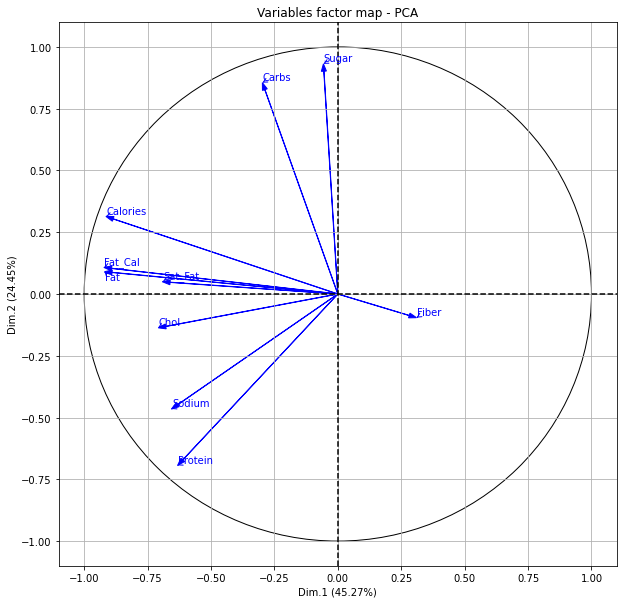

In [63]:
# Représentation graphique
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(my_pca,choice="var",ax=axe,quanti_sup=False,repel=True)

In [64]:
col["ftest"]

,Dim.1,Dim.2,Dim.3
Calories,-5.805756,1.214916,-0.775554
Fat_Cal,-5.987293,0.402724,-0.924875
Protein,-2.783000,-3.197797,0.670986
Fat,-5.945315,0.338672,-0.916038
Sat_Fat,-3.182453,0.185353,2.167843
Chol,-3.304456,-0.515656,1.211318
Sodium,-2.938655,-1.886014,-1.629072
Carbs,-1.147934,4.774062,-0.633755
Fiber,1.200333,-0.359680,-4.077573
Sugar,-0.212639,6.249601,0.518506


### Cosinus carré

In [65]:
# Cosinus carré des variables
col["cos2"]

,Dim.1,Dim.2,Dim.3
Calories,0.835502,0.098439,0.041762
Fat_Cal,0.849520,0.011496,0.058694
Protein,0.398702,0.480928,0.031482
Fat,0.846379,0.008148,0.057621
Sat_Fat,0.477972,0.002450,0.272709
Chol,0.501257,0.018755,0.097896
Sodium,0.430059,0.216507,0.167948
Carbs,0.088519,0.731700,0.028149
Fiber,0.096244,0.009184,0.634885
Sugar,0.003223,0.867857,0.018960


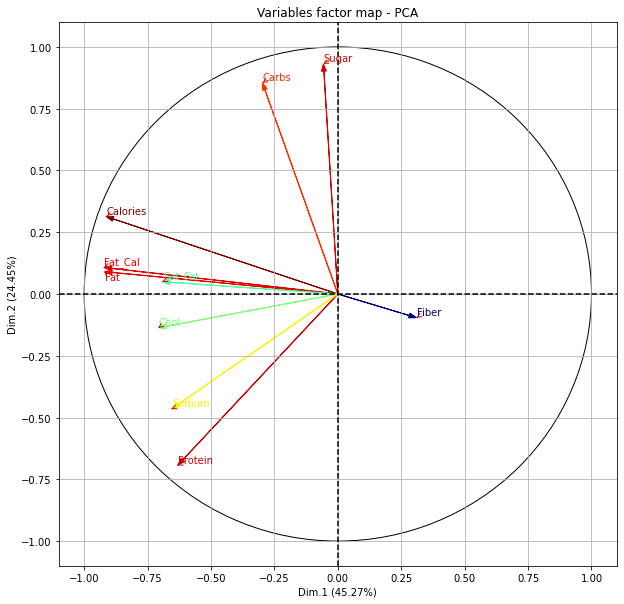

In [66]:
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(my_pca,choice="var",color="cos2",quanti_sup=False,ax=axe,repel=True)

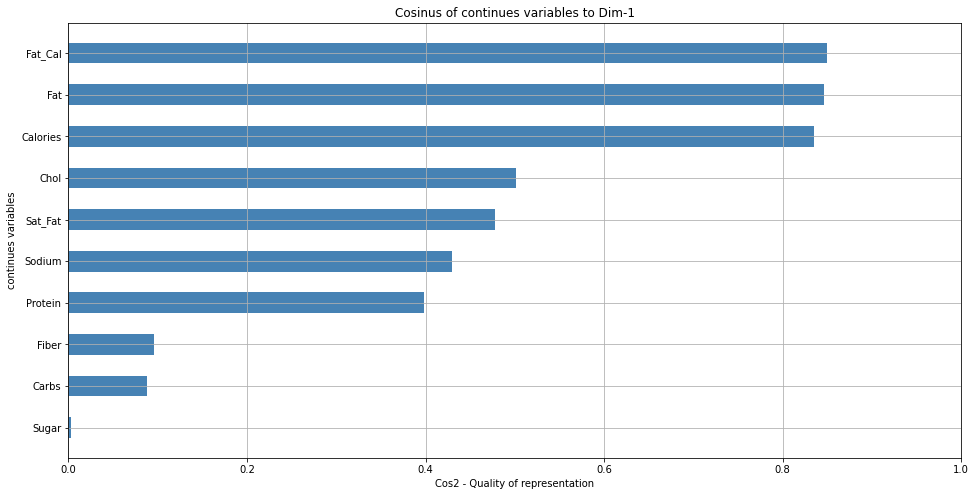

In [67]:
fig,axe = plt.subplots(figsize=(16,8))
plot_cosines(my_pca,choice="var",ax=axe)

### Contribution

In [68]:
# Contributions des variables
col["contrib"]

,Dim.1,Dim.2,Dim.3
Calories,18.454437,4.025387,2.961615
Fat_Cal,18.764076,0.470091,4.162406
Protein,8.806464,19.666118,2.232573
Fat,18.694687,0.333198,4.086321
Sat_Fat,10.557361,0.100184,19.339577
Chol,11.071698,0.766932,6.942451
Sodium,9.499072,8.853407,11.910289
Carbs,1.955196,29.920700,1.996238
Fiber,2.125826,0.375555,45.023930
Sugar,0.071183,35.488428,1.344600


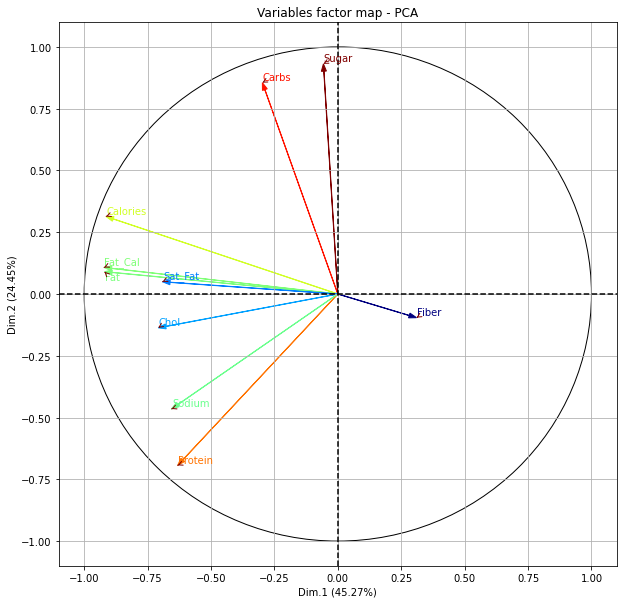

In [69]:
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(my_pca,choice="var",color="contrib",quanti_sup=False,ax=axe,repel=True)

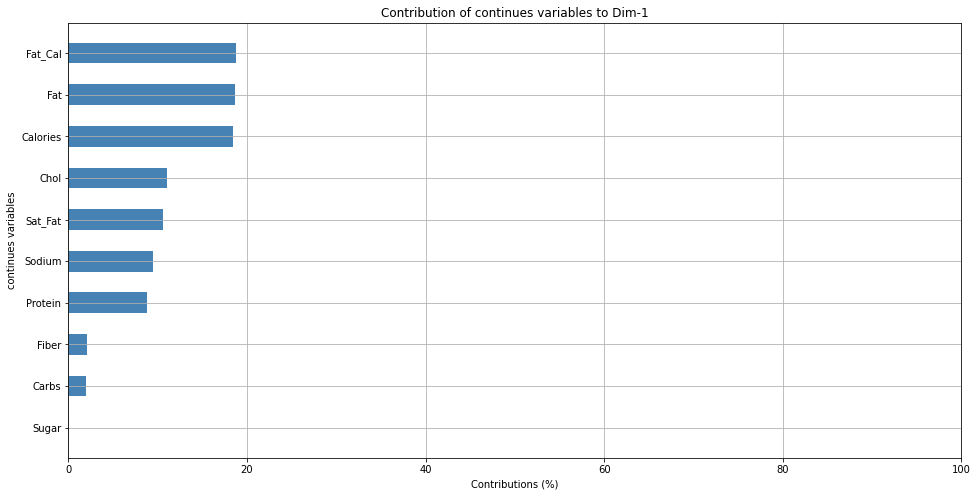

In [70]:
fig,axe = plt.subplots(figsize=(16,8))
plot_contrib(my_pca,choice="var",ax=axe)

### Informations

### Colonnes supplémentaires quantitatives

In [71]:
quanti_sup = col["quanti_sup"]
print(quanti_sup.keys())

dict_keys(['corr', 'coord', 'cos2', 'ftest'])


#### Coordonnées

In [72]:
quanti_sup["coord"]

,Dim.1,Dim.2,Dim.3
Serving_size,-0.01671,-0.523277,0.245294


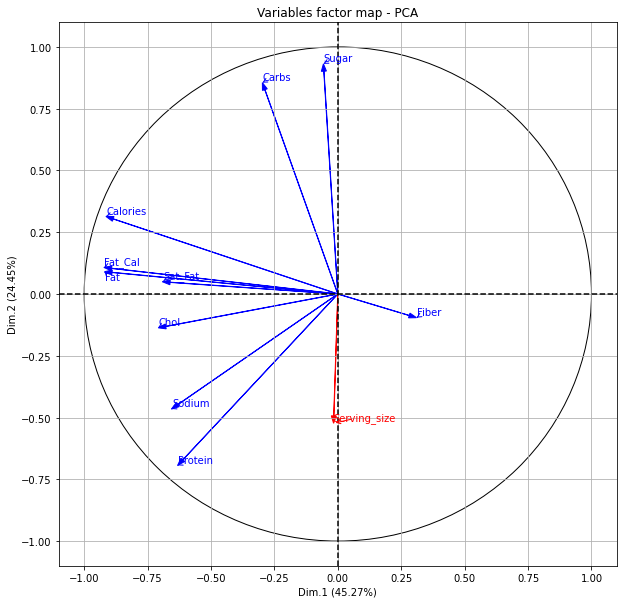

In [73]:
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(my_pca,choice="var",color="blue",quanti_sup=True,ax=axe,repel=True)

#### Cosinus carré

In [74]:
quanti_sup["cos2"]

,Dim.1,Dim.2,Dim.3
Serving_size,0.000279,0.273819,0.060169


### Colonnes supplémentaires qualitatives

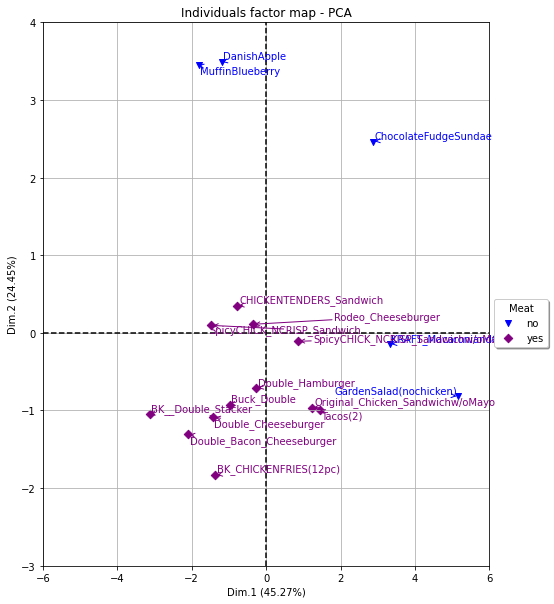

In [75]:
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(my_pca,xlim=(-6,6),ylim=(-3,4),color="blue",random_state=123,
        repel=True,habillage="Meat",ax=axe)

In [76]:
quali_sup = col["quali_sup"]
print(quali_sup.keys())

dict_keys(['stats', 'coord', 'cos2', 'dist', 'eta2', 'vtest'])


#### Coordonnées des modalités

In [77]:
quali_sup["coord"]

,Dim.1,Dim.2,Dim.3
Meat_no,1.673838,1.685409,0.311765
Meat_yes,-0.697433,-0.702254,-0.129902


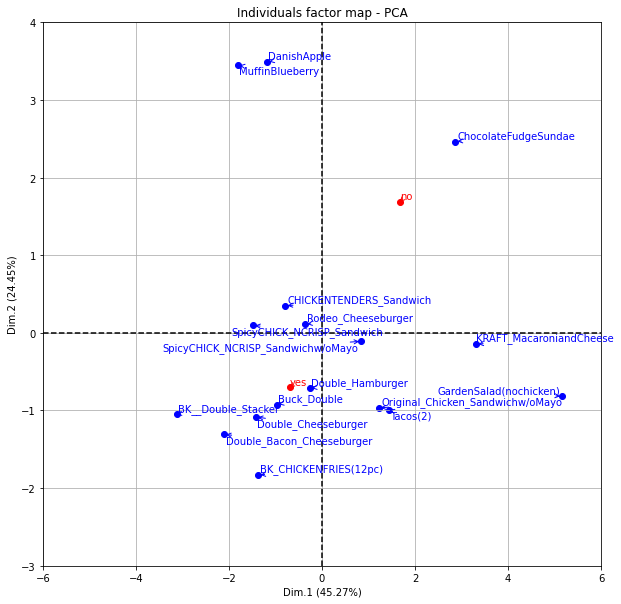

In [78]:
fig, axe = plt.subplots(figsize=(10,10))
plotPCA(my_pca,xlim=(-6,6),ylim=(-3,4),color="blue",random_state=123,
        repel=True,habillage=None,ax=axe)

#### Cosinus carré

In [79]:
# Cosinus carré des modalités
quali_sup["cos2"]

,Dim.1,Dim.2,Dim.3
Meat_no,0.485525,0.492261,0.016844
Meat_yes,0.485525,0.492261,0.016844


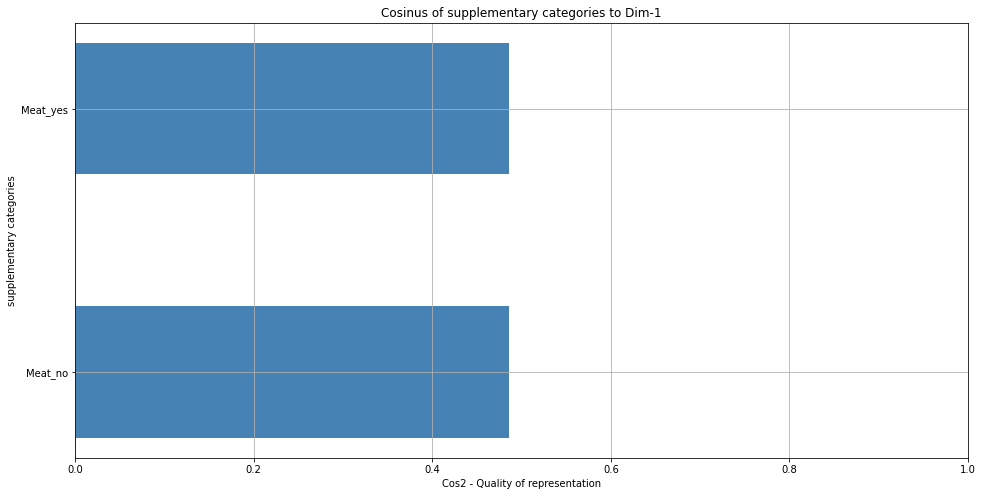

In [80]:
# Représentation graphique
fig,axe = plt.subplots(figsize=(16,8))
plot_cosines(my_pca,choice="quali_sup",ax=axe)

#### Distance des modalités avec l'origine

In [81]:
# Distance des modalités
np.sqrt(quali_sup["dist"])

,dist
Meat_no,2.402191
Meat_yes,1.000913


#### Valeur test

In [82]:
# Valeur - test
quali_sup["vtest"]

,Dim.1,Dim.2,Dim.3
Meat_no,2.031162,2.782781,0.677885
Meat_yes,-2.031162,-2.782781,-0.677885


#### Rapport de corrélation

In [83]:
# Rapport de corrélation
quali_sup["eta2"]

,Dim.1,Dim.2,Dim.3
Meat,0.257851,0.483992,0.02872


In [84]:
# Summary
summaryPCA(my_pca,to_markdown=False)

                     Principal Component Analysis - Results                     

Importance of components
                          Dim.1   Dim.2   Dim.3
Variance                  4.527   2.445   1.410
Difference                2.082   1.035   0.737
% of var.                45.274  24.455  14.101
Cumulative of % of var.  45.274  69.728  83.829

Individuals (the 10 first) - Coordonnées factorielles des 10 premiers ind. 
Avec les COS2 et les CTR.

                           d(i,G)   p(i)  I(i,G)  Dim.1     ctr   cos2  Dim.2   
ITEM                                                                            
BK__Double_Stacker          3.568  0.059   0.749 -3.127  12.708  0.768 -1.047  \
BK_CHICKENFRIES(12pc)       3.193  0.059   0.600 -1.367   2.427  0.183 -1.833   
Buck_Double                 1.916  0.059   0.216 -0.971   1.226  0.257 -0.926   
CHICKENTENDERS_Sandwich     2.054  0.059   0.248 -0.785   0.800  0.146  0.347   
ChocolateFudgeSundae        4.194  0.059   1.034  2.871  10.710

In [85]:
# Summary
summaryPCA(my_pca,to_markdown=True)

                     Principal Component Analysis - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |   Dim.3 |
|:------------------------|--------:|--------:|--------:|
| Variance                |   4.527 |   2.445 |   1.41  |
| Difference              |   2.082 |   1.035 |   0.737 |
| % of var.               |  45.274 |  24.455 |  14.101 |
| Cumulative of % of var. |  45.274 |  69.728 |  83.829 |

Individuals (the 10 first) - Coordonnées factorielles des 10 premiers ind. 
Avec les COS2 et les CTR.

| ITEM                      |   d(i,G) |   p(i) |   I(i,G) |   Dim.1 |    ctr |   cos2 |   Dim.2 |    ctr |   cos2 |   Dim.3 |    ctr |   cos2 |
|:--------------------------|---------:|-------:|---------:|--------:|-------:|-------:|--------:|-------:|-------:|--------:|-------:|-------:|
| BK__Double_Stacker        |    3.568 |  0.059 |    0.749 |  -3.127 | 12.708 |  0.768 |  -1.047 |  2.635 |  0.086 |   1.211 |  6.113 |  0.115 |
| BK_C